# Pump it Up: Data Mining the Water Table

### Can you predict which water pumps are faulty?
Using data from Taarifa and the Tanzanian Ministry of Water, can you predict which pumps are functional, which need some repairs, and which don't work at all? This is an intermediate-level practice competition. Predict one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

Competition:
https://www.drivendata.org/competitions/7/

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import os
import sys

import numpy as np
import pandas as pd

import sklearn as sk
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import xgboost as xgb

In [2]:
TRAIN_PATH = 'data/train_clean.csv'
TEST_PATH = 'data/test_clean.csv'

train_df = pd.read_csv(TRAIN_PATH,
                       index_col='id')
test_df = pd.read_csv(TEST_PATH,
                      index_col='id')

In [3]:
train_labels = train_df.pop('status_group').copy()
train_data = train_df.copy()
test_data = test_df.copy()

In [4]:
def print_shapes():
    print('train_data shape: {}'.format(train_data.shape))
    print('train_labels shape: {}'.format(train_labels.shape))
    print('test_data shape: {}'.format(test_data.shape))

print_shapes()

train_data shape: (59400, 15)
train_labels shape: (59400,)
test_data shape: (14850, 15)


## Encode categorical attributes
- LabelEncoder (ordered)
- LabelBinarizer / get_dummies (unordered)

In [5]:
train_data = pd.get_dummies(train_data)
train_data.columns.size

158

In [6]:
test_data = pd.get_dummies(test_data)
test_data.columns.size

158

In [7]:
print_shapes()

train_data shape: (59400, 158)
train_labels shape: (59400,)
test_data shape: (14850, 158)


In [8]:
train_labels = train_labels.as_matrix()
train_data = train_data.as_matrix()
test_data = test_data.as_matrix()

## Model selection

#### a) Random Forest

In [ ]:
model = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=16, max_features='log2',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0, warm_start=False,
            random_state=42)
model

#### b) XGBoost

In [15]:
model = xgb.XGBClassifier(max_depth=10, n_estimators=550, learning_rate=0.1, reg_alpha=0, reg_lambda=1.0,
                          random_state=42)
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=550,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

#### Simple train/test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=0)

In [11]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=550,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=42,
       reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


(array([4164.,    0.,    0.,    0.,    0.,  450.,    0.,    0.,    0.,
        7266.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

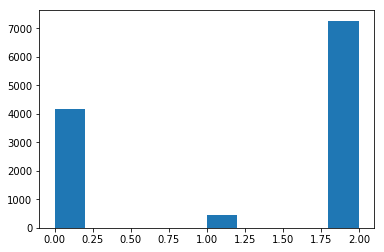

In [12]:
pred_test = model.predict(X_test)
plt.hist(pred_test)

In [13]:
accuracy_score(y_true=y_test, y_pred=pred_test)

0.80993265993266

In [14]:
pred_train = model.predict(X_train)
accuracy_score(y_true=y_train, y_pred=pred_train)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9413720538720539

In [ ]:
confmat = confusion_matrix(y_true=y_train, y_pred=pred_train)
confmat

In [ ]:
print(classification_report(y_true=y_test, y_pred=prediction))

In [ ]:
xgb.plot_importance(model)

#### Cross-validation

In [ ]:
model_scores = cross_val_score(model, train_data, train_labels, cv=5)

In [ ]:
print('Scores: {}'.format(model_scores))
print('Mean: {}'.format(model_scores.mean()))
print('Std: {}'.format(model_scores.std()))

## Train for submission

In [16]:
X_train, y_train = (train_data, train_labels)

In [17]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=550,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=42,
       reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [18]:
pred_train = model.predict(X_train)
accuracy_score(y_true=y_train, y_pred=pred_train)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9337205387205387

## Predictions for submission

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


(array([5272.,    0.,    0.,    0.,    0.,  550.,    0.,    0.,    0.,
        9028.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

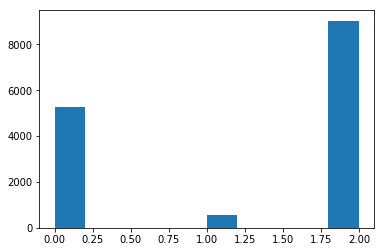

In [19]:
prediction = model.predict(test_data)
plt.hist(prediction)

In [22]:
def save_submission(predictions, test):
    data = {'id': test.index, 'status_group': predictions}

    submit = pd.DataFrame(data=data)

    vals_to_replace = {0:'non functional',
                       1:'functional needs repair',
                       2:'functional'}

    submit['status_group'] = submit['status_group'].replace(vals_to_replace)        

    submit.to_csv('pump_predictions.csv', index=False)
    
save_submission(prediction, test_df)